## <font size=5> <strong>Heart Disease Prediction By Shreekant Gosavi
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['state.db', 'xgb_model.pkl', 'decision_tree_model.pkl', 'decision_tree_limited.pkl', '.virtual_documents', 'xgboost_regularized.pkl', 'xgboost_regularized.json', 'random_forest_regularized.pkl', 'xgboost_model.json', 'decision_tree(2).pkl', 'xgboost_model.pkl', 'random_forest_model.pkl', 'decision_tree.pkl']


## II. Importing and understanding our dataset 

In [ ]:
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

#### Verifying it as a 'dataframe' object in pandas

In [ ]:
type(dataset)

#### Shape of dataset

In [ ]:
dataset.shape

#### Printing out a few columns

In [ ]:
dataset.head(5)

In [ ]:
dataset.sample(5)

#### Description

In [ ]:
dataset.describe()

In [ ]:
dataset.info()

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset.dropna()

In [ ]:
target_valid=[0,1]
target_invalid = dataset[~dataset['target'].isin(target_valid)]
print(target_invalid)

#### Let's understand our columns better:

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

#### Analysing the 'target' variable

In [ ]:
dataset["target"].describe()

In [ ]:
dataset["target"].unique()

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

In [ ]:
corr_matrix = dataset.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Tiêu đề
plt.title("Ma trận tương quan", fontsize=14)

# Hiển thị biểu đồ
plt.show()

In [ ]:
print(dataset["target"].value_counts())

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

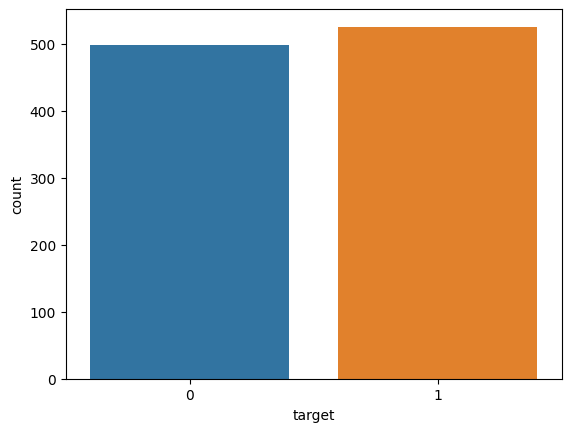

target
1    526
0    499
Name: count, dtype: int64


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

y = dataset["target"]

sns.countplot(x=y)  # Đảm bảo dùng x=y
plt.show()  # Thêm plt.show() để hiển thị biểu đồ trong một số trường hợp

target_temp = dataset.target.value_counts()
print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [ ]:
dataset["sex"].unique()

##### We notice, that as expected, the 'sex' feature has 2 unique features

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=dataset["sex"], y=y)  # Định rõ x và y
plt.show()  # Hiển thị biểu đồ

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [ ]:
dataset["cp"].unique()

##### As expected, the CP feature has values from 0 to 3

In [ ]:
sns.barplot(x=dataset["cp"],y=y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [ ]:
dataset["fbs"].describe()

In [ ]:
dataset["fbs"].unique()

In [ ]:
sns.barplot(x=dataset["fbs"],y=y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [ ]:
dataset["restecg"].unique()

In [ ]:
sns.barplot(x=dataset["restecg"],y=y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [ ]:
dataset["exang"].unique()

In [ ]:
sns.barplot(x=dataset["exang"],y=y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [ ]:
dataset["slope"].unique()

In [ ]:
sns.barplot(x=dataset["slope"],y=y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the Age feature

In [ ]:
dataset["age"].unique()

In [ ]:
mean_age = dataset["age"].mean()
var_age = dataset["age"].var()
min_age = dataset["age"].min()
max_age = dataset["age"].max()
print(f"Mean age: {mean_age}")
print(f"Variance of age: {var_age}")
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
plt.figure(figsize=(10,6))
sns.histplot(dataset["age"], bins=10, kde=True)

# Thiết lập tiêu đề và nhãn
plt.title("Distribution of Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

### Analysing the 'ca' feature

In [ ]:
#number of major vessels (0-3) colored by flourosopy

In [ ]:
dataset["ca"].unique()

In [ ]:
sns.countplot(dataset["ca"])

In [ ]:
sns.barplot(x=dataset["ca"],y=y)

##### ca=4 has astonishingly large number of heart patients

In [ ]:
### Analysing the 'thal' feature

In [ ]:
dataset["thal"].unique()

In [ ]:
sns.barplot(x=dataset["thal"],y=y)

In [ ]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [3]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [4]:
X_train.shape

(820, 13)

In [5]:
X_test.shape

(205, 13)

In [6]:
Y_train.shape

(820,)

In [7]:
Y_test.shape

(205,)

## V. Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

### K Nearest Neighbors

In [8]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

In [9]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

In [10]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [11]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Khởi tạo và huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Sử dụng 5 hàng xóm gần nhất
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
# Dự đoán trên tập kiểm tra
y_pred_knn = knn.predict(X_test)

In [14]:
# Tính các chỉ số đánh giá
knn_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "F1": f1_score(y_test, y_pred_knn)
}

In [15]:
# Hiển thị kết quả dưới dạng bảng
print("=== Kết quả đánh giá mô hình K-Nearest Neighbors (KNN) ===")
results_df_knn = pd.DataFrame(knn_metrics, index=["KNN"])
print(results_df_knn)

=== Kết quả đánh giá mô hình K-Nearest Neighbors (KNN) ===
     Accuracy  Precision    Recall      F1
KNN  0.731707   0.730769  0.737864  0.7343


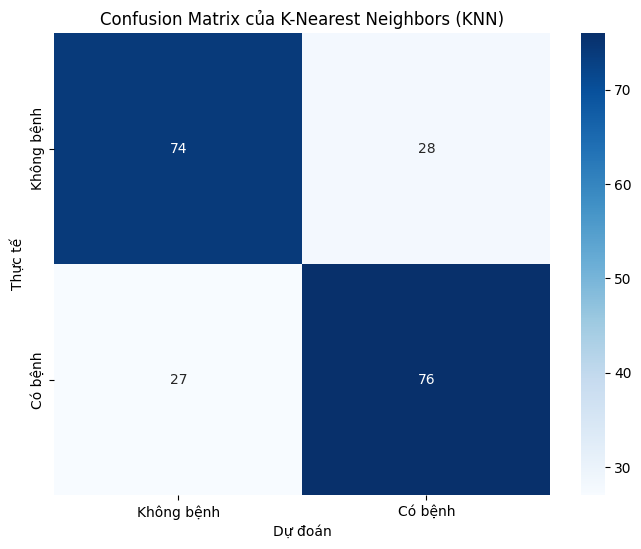

In [16]:
# Vẽ Confusion Matrix cho KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của K-Nearest Neighbors (KNN)")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

In [17]:
# Lưu mô hình KNN
model_filename_knn = "/kaggle/working/knn_model_ML.pkl"
joblib.dump(knn, model_filename_knn)
print(f"✅ Mô hình KNN đã được lưu tại: {model_filename_knn}")

✅ Mô hình KNN đã được lưu tại: /kaggle/working/knn_model_ML.pkl


### Logistic Regression

In [18]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

In [19]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

In [20]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [21]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Khởi tạo và huấn luyện mô hình Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
# Dự đoán trên tập kiểm tra
y_pred_lr = lr.predict(X_test)

In [24]:
# Tính các chỉ số đánh giá
lr_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1": f1_score(y_test, y_pred_lr)
}

In [25]:
# Hiển thị kết quả dưới dạng bảng
print("=== Kết quả đánh giá mô hình Logistic Regression ===")
results_df_lr = pd.DataFrame(lr_metrics, index=["Logistic Regression"])
print(results_df_lr)

=== Kết quả đánh giá mô hình Logistic Regression ===
                     Accuracy  Precision    Recall        F1
Logistic Regression  0.795122   0.756303  0.873786  0.810811


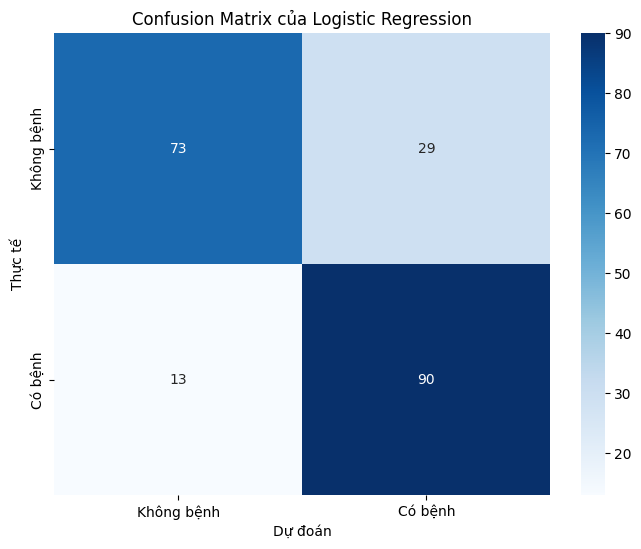

In [26]:
# Vẽ Confusion Matrix cho Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của Logistic Regression")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

In [28]:
# Lưu mô hình Logistic Regression
model_filename_lr = "/kaggle/working/logistic_regression_model_ML.pkl"
joblib.dump(lr, model_filename_lr)
print(f"✅ Mô hình Logistic Regression đã được lưu tại: {model_filename_lr}")

✅ Mô hình Logistic Regression đã được lưu tại: /kaggle/working/logistic_regression_model_ML.pkl


### SVM

In [29]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

In [30]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

In [31]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [32]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Khởi tạo và huấn luyện mô hình SVM
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [34]:
# Dự đoán trên tập kiểm tra
y_pred_svm = svm.predict(X_test)

In [35]:
# Tính các chỉ số đánh giá
svm_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm),
    "Recall": recall_score(y_test, y_pred_svm),
    "F1": f1_score(y_test, y_pred_svm)
}

In [36]:
# Hiển thị kết quả dưới dạng bảng
print("=== Kết quả đánh giá mô hình Support Vector Machine (SVM) ===")
results_df_svm = pd.DataFrame(svm_metrics, index=["SVM"])
print(results_df_svm)

=== Kết quả đánh giá mô hình Support Vector Machine (SVM) ===
     Accuracy  Precision    Recall        F1
SVM  0.682927   0.661017  0.757282  0.705882


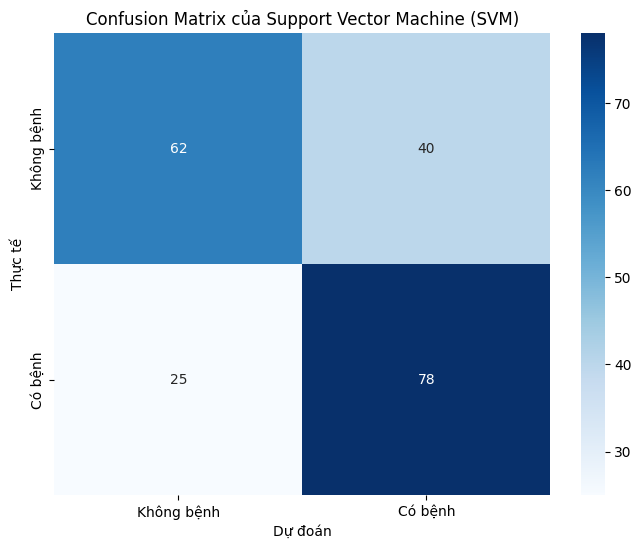

In [37]:
# Vẽ Confusion Matrix cho SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của Support Vector Machine (SVM)")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

In [38]:
# Lưu mô hình SVM
model_filename_svm = "/kaggle/working/svm_model_ML.pkl"
joblib.dump(svm, model_filename_svm)
print(f"✅ Mô hình SVM đã được lưu tại: {model_filename_svm}")

✅ Mô hình SVM đã được lưu tại: /kaggle/working/svm_model_ML.pkl


### XG Boost

In [39]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

In [40]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

In [41]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [42]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Khởi tạo và huấn luyện mô hình XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [44]:
# Dự đoán trên tập kiểm tra
y_pred_xgb = xgb.predict(X_test)

In [45]:
# Tính các chỉ số đánh giá
xgb_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1": f1_score(y_test, y_pred_xgb)
}

In [46]:
# Hiển thị kết quả dưới dạng bảng
print("=== Kết quả đánh giá mô hình XGBoost ===")
results_df_xgb = pd.DataFrame(xgb_metrics, index=["XGBoost"])
print(results_df_xgb)

=== Kết quả đánh giá mô hình XGBoost ===
         Accuracy  Precision    Recall        F1
XGBoost  0.985366        1.0  0.970874  0.985222


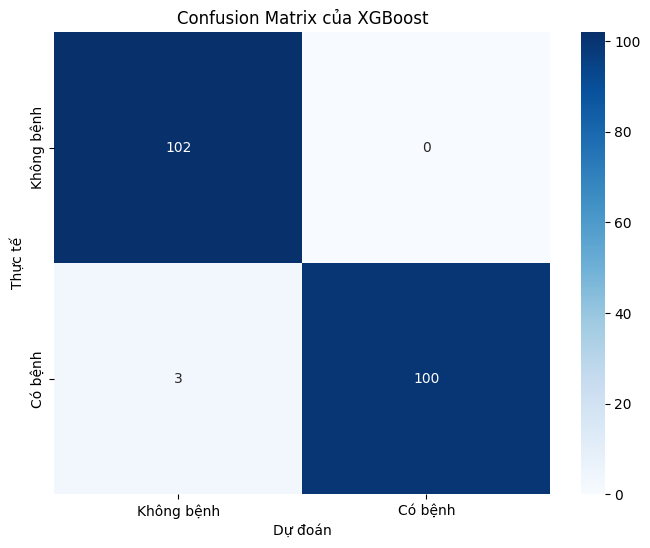

In [47]:
# Vẽ Confusion Matrix cho XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của XGBoost")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

In [48]:
model_filename_xgb = "/kaggle/working/xgboost_model_ML.json"
xgb.save_model(model_filename_xgb)  # Sử dụng phương thức save_model của XGBoost để lưu dưới dạng JSON
print(f"✅ Mô hình XGBoost đã được lưu dưới dạng JSON tại: {model_filename_xgb}")

✅ Mô hình XGBoost đã được lưu dưới dạng JSON tại: /kaggle/working/xgboost_model_ML.json


### Decision Tree

In [49]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

In [50]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

In [51]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [52]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Khởi tạo và huấn luyện mô hình Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
# Dự đoán trên tập kiểm tra
y_pred_dt = dt.predict(X_test)

In [55]:
# Tính các chỉ số đánh giá
dt_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "F1": f1_score(y_test, y_pred_dt)
}

In [56]:
# Hiển thị kết quả dưới dạng bảng
print("=== Kết quả đánh giá mô hình Decision Tree ===")
results_df_dt = pd.DataFrame(dt_metrics, index=["Decision Tree"])
print(results_df_dt)

=== Kết quả đánh giá mô hình Decision Tree ===
               Accuracy  Precision    Recall        F1
Decision Tree  0.985366        1.0  0.970874  0.985222


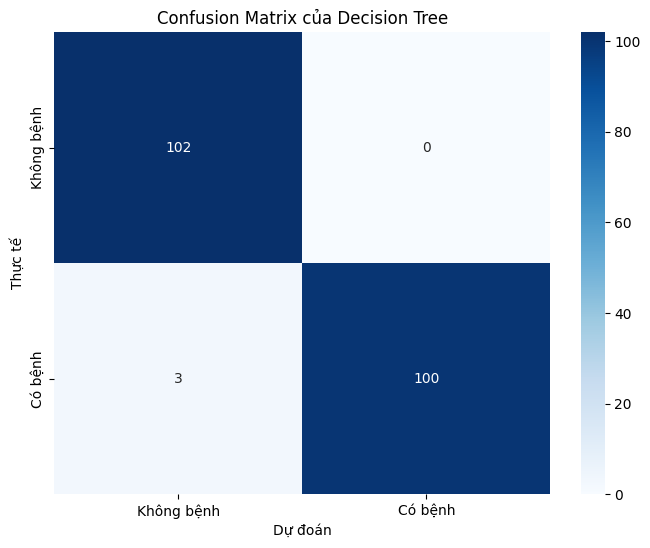

In [57]:
# Vẽ Confusion Matrix cho Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của Decision Tree")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

In [58]:
# Lưu mô hình Decision Tree
model_filename_dt = "/kaggle/working/decision_tree_model_ML.pkl"
joblib.dump(dt, model_filename_dt)
print(f"✅ Mô hình Decision Tree đã được lưu tại: {model_filename_dt}")

✅ Mô hình Decision Tree đã được lưu tại: /kaggle/working/decision_tree_model_ML.pkl


### Random Forest

In [59]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

In [60]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

In [61]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [62]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
# Dự đoán trên tập kiểm tra
y_pred_rf = rf.predict(X_test)

In [65]:
# Tính các chỉ số đánh giá
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1": f1_score(y_test, y_pred_rf)
}

In [66]:
# Hiển thị kết quả dưới dạng bảng
print("=== Kết quả đánh giá mô hình Random Forest ===")
results_df_rf = pd.DataFrame(rf_metrics, index=["Random Forest"])
print(results_df_rf)

=== Kết quả đánh giá mô hình Random Forest ===
               Accuracy  Precision    Recall        F1
Random Forest  0.985366        1.0  0.970874  0.985222


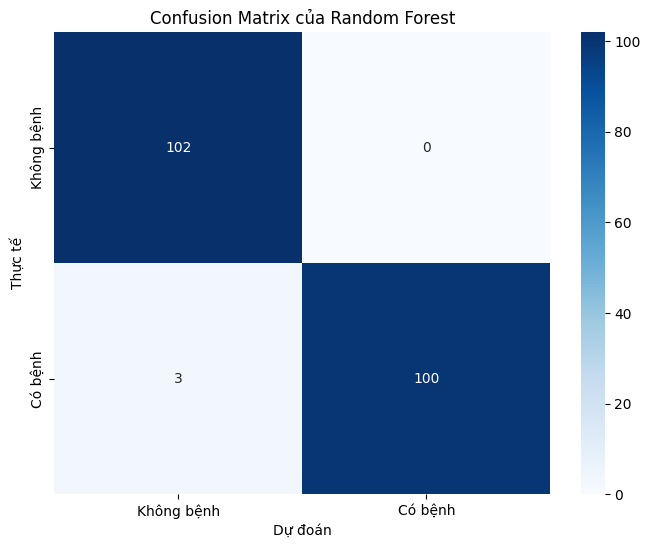

In [67]:
# Vẽ Confusion Matrix cho Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của Random Forest")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

In [68]:
# Lưu mô hình Random Forest
model_filename_rf = "/kaggle/working/random_forest_model_ML.pkl"
joblib.dump(rf, model_filename_rf)
print(f"✅ Mô hình Random Forest đã được lưu tại: {model_filename_rf}")

✅ Mô hình Random Forest đã được lưu tại: /kaggle/working/random_forest_model_ML.pkl


## VI. Output final score

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

### Hey arbaaz there random forest has good result as compare to other algorithms <br> <br>